In [1]:
import yfinance as yf
import pandas as pd

# Download NVIDIA (NVDA) stock data
ticker = "NVDA"
stock_data = yf.download(ticker, start="2022-01-01", end="2024-01-01")

# Display the first few rows of the dataset
stock_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,29.815001,30.711000,29.785000,30.121000,30.075632,391547000
2022-01-04,30.277000,30.468000,28.349001,29.290001,29.245882,527154000
2022-01-05,28.948999,29.416000,27.533001,27.604000,27.562424,498064000
2022-01-06,27.639999,28.438000,27.065001,28.177999,28.135555,454186000
2022-01-07,28.141001,28.422001,27.056999,27.247000,27.205961,409939000


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [2]:
# Add columns for the day of the week and day number (0=Monday, 4=Friday)
stock_data['Day of Week'] = stock_data.index.day_name()
stock_data['Day Number'] = stock_data.index.dayofweek

# Calculate the average closing price for each day of the week
average_price_by_day = stock_data.groupby('Day of Week')['Close'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)


In [3]:
import plotly.express as px

# Create a plot using Plotly
fig = px.bar(
    average_price_by_day,
    x=average_price_by_day.index,
    y='Close',
    title="Average Closing Price of NVDA by Day of the Week (2022-2024)",
    labels={"Close": "Average Closing Price (USD)", "index": "Day of the Week"},
    color=average_price_by_day.index
)

# Show the plot
fig.show()


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Download NVIDIA (NVDA) stock data
ticker = "NVDA"
stock_data = yf.download(ticker, start="2022-01-01", end="2024-01-01")

# Add columns for the day of the week and daily returns
stock_data['Day of Week'] = stock_data.index.day_name()
stock_data['Day Number'] = stock_data.index.dayofweek
stock_data['Daily Return'] = stock_data['Close'].pct_change()

# Calculate average closing price for each day of the week
average_price_by_day = stock_data.groupby('Day of Week')['Close'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)

# Calculate average daily return for each day of the week
average_return_by_day = stock_data.groupby('Day of Week')['Daily Return'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)

# Calculate volatility (standard deviation of returns) for each day of the week
volatility_by_day = stock_data.groupby('Day of Week')['Daily Return'].std().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)

# Visualization of Average Closing Price by Day of the Week
fig1 = px.bar(
    average_price_by_day,
    x=average_price_by_day.index,
    y='Close',
    title="Average Closing Price of NVDA by Day of the Week (2022-2024)",
    labels={"Close": "Average Closing Price (USD)", "index": "Day of the Week"},
    color=average_price_by_day.index
)

# Visualization of Average Daily Return by Day of the Week
fig2 = px.bar(
    average_return_by_day,
    x=average_return_by_day.index,
    y='Daily Return',
    title="Average Daily Return of NVDA by Day of the Week (2022-2024)",
    labels={"Daily Return": "Average Daily Return (%)", "index": "Day of the Week"},
    color=average_return_by_day.index
)

# Visualization of Volatility by Day of the Week
fig3 = px.bar(
    volatility_by_day,
    x=volatility_by_day.index,
    y='Daily Return',
    title="Volatility of NVDA by Day of the Week (2022-2024)",
    labels={"Daily Return": "Volatility (Standard Deviation of Returns)", "index": "Day of the Week"},
    color=volatility_by_day.index
)

# Show the plots
fig1.show()
fig2.show()
fig3.show()


[*********************100%%**********************]  1 of 1 completed


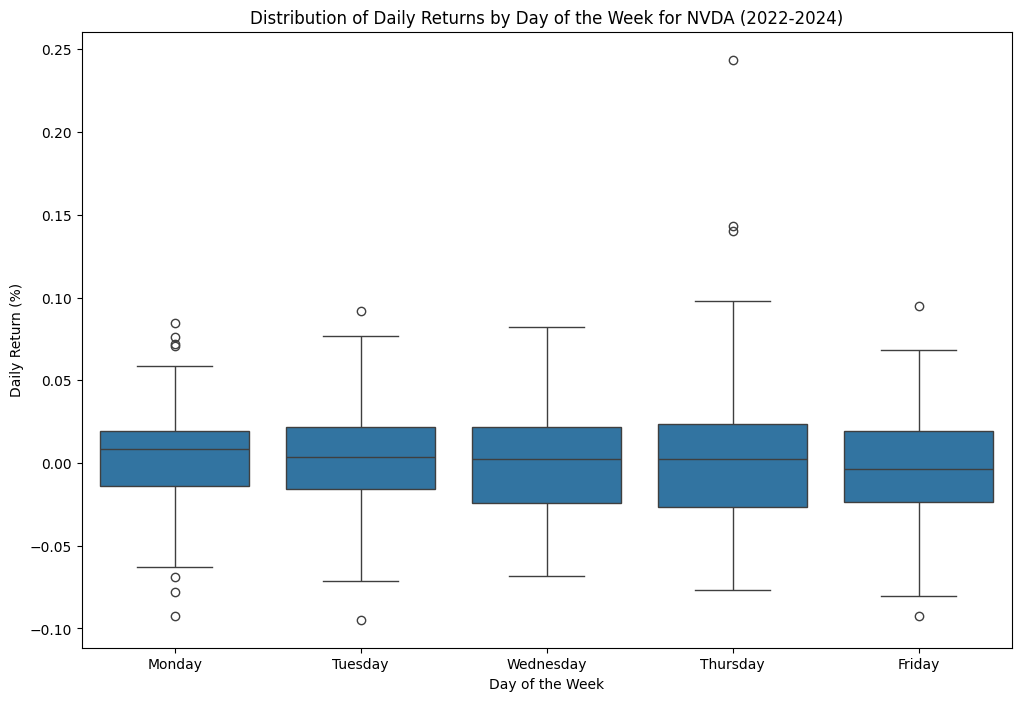

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of daily returns by day of the week
plt.figure(figsize=(12, 8))
sns.boxplot(x='Day of Week', y='Daily Return', data=stock_data)
plt.title("Distribution of Daily Returns by Day of the Week for NVDA (2022-2024)")
plt.xlabel("Day of the Week")
plt.ylabel("Daily Return (%)")
plt.show()


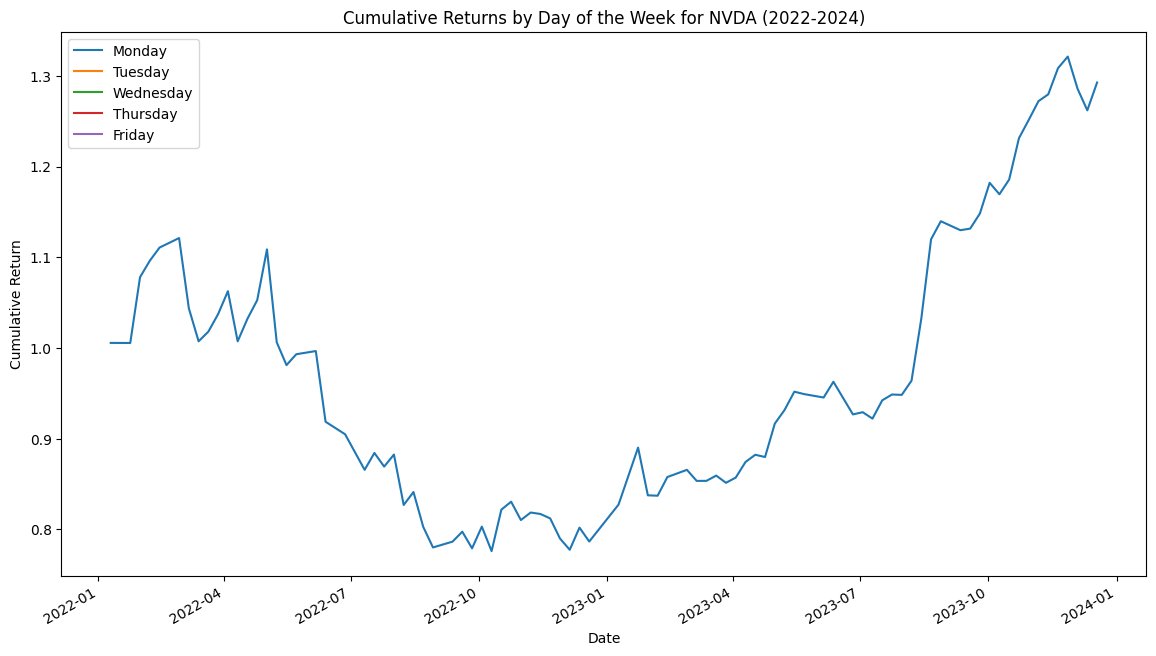

In [6]:
cumulative_returns = pd.DataFrame()

# Calculate cumulative returns by investing on specific days
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
    day_returns = stock_data[stock_data['Day of Week'] == day]['Daily Return'] + 1
    cumulative_returns[day] = day_returns.cumprod()

# Plot cumulative returns for each day of the week
cumulative_returns.plot(figsize=(14, 8), title="Cumulative Returns by Day of the Week for NVDA (2022-2024)")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.show()


In [7]:
# Assume risk-free rate is 0 for simplicity
risk_free_rate = 0

# Calculate Sharpe Ratio for each day of the week
sharpe_ratios = (average_return_by_day - risk_free_rate) / volatility_by_day

# Plot the Sharpe Ratios
fig = px.bar(
    sharpe_ratios,
    x=sharpe_ratios.index,
    y='Daily Return',
    title="Sharpe Ratio by Day of the Week for NVDA (2022-2024)",
    labels={"Daily Return": "Sharpe Ratio", "index": "Day of the Week"},
    color=sharpe_ratios.index
)
fig.show()


In [9]:
# Calculate average volume for each day of the week
average_volume_by_day = stock_data.groupby('Day of Week')['Volume'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)

# Plot average trading volume by day of the week
fig4 = px.bar(
    average_volume_by_day,
    x=average_volume_by_day.index,
    y='Volume',
    title="Average Trading Volume by Day of the Week for NVDA (2022-2024)",
    labels={"Volume": "Average Volume", "index": "Day of the Week"},
    color=average_volume_by_day.index
)
fig4.show()
